In [1]:
from keras.models import load_model
model_best = load_model("bigtfifd_best.hdf5")

Using Theano backend.


In [2]:
from scipy.io import mmread
import numpy as np

In [3]:
sparse_mat_train_test = mmread("../data/features/tfifd_4gram_hashed_full_features.mtx")

In [4]:
# load training classes
classes = np.load("../data/features/train_classes.npy")
# convert csr to a numpy array
sparse = sparse_mat_train_test.toarray()
X_test = sparse[classes.shape[0]:,:]
print X_test.shape


(3724, 1048576)


In [5]:
class_preds = model_best.predict_classes(X_test)

3724/3724 [==============================] - 1535s     

In [6]:
malware_classes = ["Agent", "AutoRun", "FraudLoad", "FraudPack", "Hupigon", "Krap",
           "Lipler", "Magania", "None", "Poison", "Swizzor", "Tdss",
           "VB", "Virut", "Zbot"]

# a function for writing predictions in the required format
def write_predictions(predictions, ids, outfile):
    """
    assumes len(predictions) == len(ids), and that predictions[i] is the
    index of the predicted class with the malware_classes list above for
    the executable corresponding to ids[i].
    outfile will be overwritten
    """
    with open(outfile,"w+") as f:
        # write header
        f.write("Id,Prediction\n")
        for i, history_id in enumerate(ids):
            f.write("%s,%d\n" % (history_id, predictions[i]))

def classes_to_Y(classes):
    output = []
    for cls in classes:
        output.append(malware_classes.index(cls))
    return np.array(output)

In [9]:
test_ids = np.load("../data/features/test_ids.npy")
print test_ids
print class_preds
write_predictions(class_preds, test_ids, "../predictions/tfidf_deepnet.csv")

['e5b875f7e584b29fd9e85c1f232956849aabcb311'
 '18abefbfb74285D709bcf665d594df11bf56e1984'
 '47cd5265b1fc52021c025452e084c405a0a03df1e' ...,
 '6abb75b149d8e39e30c8df2c19bfd96986f0e35b3'
 'f0e968070037717da88665ab091ff2B4973528f30'
 '7b2459e11cac9341a00fa7bDcd5b17618a0b97dc8']
[10  5  8 ..., 10  8  8]


In [10]:
variance = np.var(sparse, axis=0)

In [11]:
print variance

[  6.78132012e-10   5.15309748e-09   5.56234849e-09 ...,   1.19512920e-09
   2.12363516e-09   5.40744762e-09]


In [12]:
print variance.mean()

7.10276563893e-07


In [13]:
print sparse

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [14]:
print variance.max()

0.00768198036369


In [15]:
print variance.min()

5.11295654065e-11


In [24]:
test = np.zeros(len(sparse))
test[0] = .0005
print np.var(test)

3.67053288224e-11


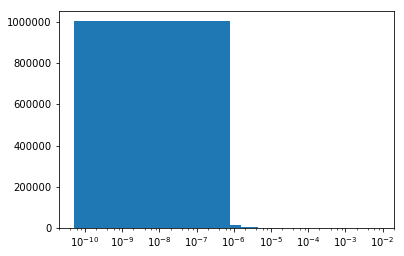

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(variance, bins=10000);
plt.xscale('log')

In [ ]:
filtered = sparse[:,variance > 1 * 10 ** -9]

In [31]:
class_w = {}

In [27]:
n = len(classes)

In [71]:
r = .0130 * n

In [34]:
t = .5214 * n

In [72]:
t / r

40.10769230769231

In [74]:
class_w[15] = 1

In [75]:
class_w

{0: 14,
 1: 32,
 2: 43,
 3: 51,
 4: 39,
 5: 41,
 6: 30,
 7: 39,
 8: 1,
 9: 77,
 10: 3,
 11: 50,
 12: 4,
 13: 27,
 14: 40,
 15: 1}

In [ ]:
print "blah"